# HOMEWORK 1
Corso di Sistemi informativi evoluti e big data

*Sabbadini Marco mat. 723421*



## INSTALLO E IMPORTO LIBRERIE

In [1]:
pip install pymongo

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pymongo
from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

## Connessione al DataBase MongoDB

In [5]:
myclient = MongoClient("mongodb://localhost:27017/")

In [6]:
myDb = myclient["Movies_dataset"]

In [7]:
Ucol = myDb["U"]
UAcol = myDb["UA"]
Acol = myDb["A"]

In [8]:
df = pd.read_csv("imdb_top_1000.csv")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [10]:
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [11]:
generi = df['Genre'].str.split(', ')

generi_unici = set(g for sublist in generi for g in sublist)

lista_generi_unici = list(generi_unici)

In [12]:
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')
df['IMDB_Rating'] = df['IMDB_Rating'].round().astype(int)


df['Released_Year'].fillna(0, inplace=True)
df['IMDB_Rating'].fillna(0, inplace=True)

df['Released_Year'] = df['Released_Year'].astype(int)
df['IMDB_Rating'] = df['IMDB_Rating'].astype(int)

/var/folders/qv/6mbz0rjd001fjvsgxt9w3k_c0000gn/T/ipykernel_30492/3875370267.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Released_Year'].fillna(0, inplace=True)
/var/folders/qv/6mbz0rjd001fjvsgxt9w3k_c0000gn/T/ipykernel_30492/3875370267.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

Funzione per andare a sistemare i valori in Gross andando a rimuovere $ e virgole

In [13]:
df['Gross'] = pd.to_numeric(df['Gross'].replace('[\$,]', '', regex=True), errors='coerce')

## FUNZIONE INSERT_MOVIES

Funzione che inserisce i film in collections andandoli a filtrare sulla base di alcuni criteri

In [14]:
def insert_movies(df):
    for _, row in df.iterrows():
        cert = row["Certificate"]

        if cert == "U":
            collection = myDb["Universal"]
        elif cert == "UA":
            collection = myDb["ParentalGuidance"]
        elif cert == "A":
            collection = myDb["Adult"]
        else:
            if ((row["Released_Year"] < 1980) & (row["IMDB_Rating"] < 8)):
                collection = myDb["Trash"]
            else:
                continue

        film = row.to_dict()
        collection.insert_one(film)


In [15]:
insert_movies(df)

In [16]:
collections = ['Universal', 'ParentalGuidance', 'Adult']

# INTERROGAZIONI


# SENZA DISTINZIONE SUL CERTIFICATO

1) Trovare tutti i film pubblicati dopo il 2015 raggruppati per genere (ad esempio
"fantascienza" o "giallo"); visualizzare in un istogramma il numero di film per ogni genere

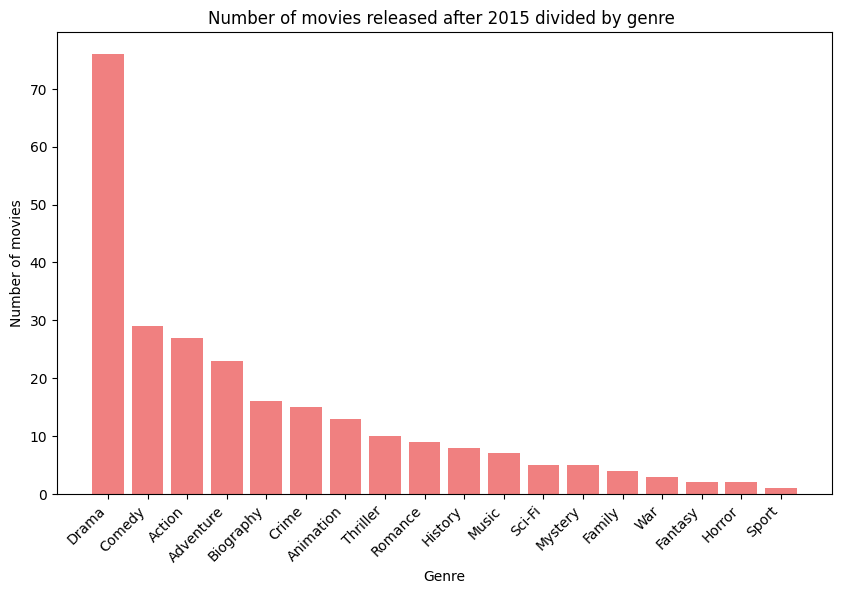

In [17]:
movies_post_15 = df[df['Released_Year'] > 2015]


generi = movies_post_15['Genre'].str.split(', ')

# Contiamo ogni genere in un'unica lista
genre_count = {}
for genre_list in generi:
    for genere in genre_list:
        genre_count[genere] = genre_count.get(genere, 0) + 1

df_genre = pd.DataFrame(list(genre_count.items()), columns=['Genre', 'Count'])
df_genre = df_genre.sort_values(by='Count', ascending=False)

# 4. Visualizzare in un istogramma
plt.figure(figsize=(10, 6))
plt.bar(df_genre['Genre'], df_genre['Count'], color='lightcoral')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Genre')
plt.ylabel('Number of movies')
plt.title('Number of movies released after 2015 divided by genre ')
plt.show()


2) Trovare i primi 5 film per ogni genere, sulla base del voto.

In [18]:
top_by_genre = {}

for col_name in collections:
    collection = myDb[col_name]
    
    genres = collection.distinct("Genre")
    
    def get_top_movies_for_genre(genre):
        query = {"Genre": {"$regex": genre}}
        
        return list(collection.find(query).sort("IMDB_Rating", -1).limit(5))
    
    for genre in lista_generi_unici:
        top_by_genre[genre] = get_top_movies_for_genre(genre)

for genre, movies in top_by_genre.items():
    print(f"\nTop 5 film per il genere '{genre}':")
    for movie in movies:
        print(f"{movie['Series_Title']} ({movie['IMDB_Rating']})")



Top 5 film per il genere 'Biography':
Schindler's List (9)
Goodfellas (9)
Braveheart (8)
Raging Bull (8)
The Wolf of Wall Street (8)

Top 5 film per il genere 'Comedy':
Gisaengchung (9)
Three Billboards Outside Ebbing, Missouri (8)
Lock, Stock and Two Smoking Barrels (8)
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (8)
Gangs of Wasseypur (8)

Top 5 film per il genere 'Western':
Il buono, il brutto, il cattivo (9)
Unforgiven (8)
The Wild Bunch (8)
Django Unchained (8)
Per un pugno di dollari (8)

Top 5 film per il genere 'Drama':
The Godfather: Part II (9)
Schindler's List (9)
The Shawshank Redemption (9)
The Godfather (9)
Pulp Fiction (9)

Top 5 film per il genere 'Sci-Fi':
The Matrix (9)
V for Vendetta (8)
The Thing (8)
A Clockwork Orange (8)
Logan (8)

Top 5 film per il genere 'Romance':
Her (8)
Annie Hall (8)
Vertigo (8)
Ah-ga-ssi (8)
Dev.D (8)

Top 5 film per il genere 'Sport':
Raging Bull (8)
The Hustler (8)
Creed (8)

Top 5 film per il genere 'Adventure':

3) Trovare il film più vecchio e più recente per ogni genere.

In [19]:
oldest_movie_by_genre = {}
newest_movie_by_genre = {}

In [20]:
for col_name in collections:
    collection = myDb[col_name]
    
    # Otteniamo l'elenco di generi unici nella collezione corrente
    genres = lista_generi_unici
    
    # Funzione per ottenere i top 5 film per un dato genere
    def get_oldest_movie_for_genre(genre):
        # Usare una regex per cercare il genere in modo flessibile
        query = {"Genre": {"$regex": genre}}
        # Ritornare film più vecchio
        return collection.find_one(query, sort=[("Released_Year", 1)])
    
    def get_newest_movie_for_genre(genre):
        # Usare una regex per cercare il genere in modo flessibile
        query = {"Genre": {"$regex": genre}}
        # Ritornare film più vecchio
        return collection.find_one(query, sort=[("Released_Year", -1)])
    
    for genre in genres:
        oldest_movie_by_genre[genre] = get_oldest_movie_for_genre(genre)
        newest_movie_by_genre[genre] = get_newest_movie_for_genre(genre)
    

for genre in oldest_movie_by_genre:
    oldest_movie = oldest_movie_by_genre[genre]
    newest_movie = newest_movie_by_genre[genre]
    print(f"\nOldest movie for genre '{genre}':")
    print(f"{oldest_movie['Series_Title']} ({oldest_movie['Released_Year']})")
    print(f"Newest movie for genre '{genre}':")
    print(f"{newest_movie['Series_Title']} ({newest_movie['Released_Year']})")


Oldest movie for genre 'Biography':
Spartacus (1960)
Newest movie for genre 'Biography':
Just Mercy (2019)

Oldest movie for genre 'Comedy':
La dolce vita (1960)
Newest movie for genre 'Comedy':
Gisaengchung (2019)

Oldest movie for genre 'Western':
Per un pugno di dollari (1964)
Newest movie for genre 'Western':
Django Unchained (2012)

Oldest movie for genre 'Drama':
Rope (1948)
Newest movie for genre 'Drama':
Gisaengchung (2019)

Oldest movie for genre 'Sci-Fi':
A Clockwork Orange (1971)
Newest movie for genre 'Sci-Fi':
Logan (2017)

Oldest movie for genre 'Romance':
Vertigo (1958)
Newest movie for genre 'Romance':
Ah-ga-ssi (2016)

Oldest movie for genre 'Sport':
The Hustler (1961)
Newest movie for genre 'Sport':
Creed (2015)

Oldest movie for genre 'Adventure':
Spartacus (1960)
Newest movie for genre 'Adventure':
The Revenant (2015)

Oldest movie for genre 'Film-Noir':
Strangers on a Train (1951)
Newest movie for genre 'Film-Noir':
Strangers on a Train (1951)

Oldest movie for ge

4) Trovare il film più vecchio con la valutazione più alta.

In [21]:
oldest_highest_rated = None

for col_name in collections:
    collection = myDb[col_name]
    cursor = collection.find({}, sort=[("Released_Year", 1), ("IMDB_Rating", -1)]).limit(1)
    film = list(cursor)[0]

    if not oldest_highest_rated or film["Released_Year"] < oldest_highest_rated["Released_Year"]:
        oldest_highest_rated = film

print(f"\nHighest ranked oldest movie")
print(f"{oldest_highest_rated['Series_Title']} ({oldest_highest_rated['Released_Year']}) - Rating: {oldest_highest_rated['IMDB_Rating']}")



Highest ranked oldest movie
Apollo 13 (0) - Rating: 8


5) Trovare i primi 5 film con la maggiore durata.

In [22]:
longest_movies = []

for col_name in collections:
    collection = myDb[col_name]
    cursor = collection.find({}, sort=[("Runtime", -1)]).limit(5)
    longest_movies.extend(list(cursor))

longest_movies = sorted(longest_movies, key=lambda x: x["Runtime"], reverse=True)[:5]

print("\nTop 5 longest movies")
for movie in longest_movies:
    print(f"{movie['Series_Title']} : {movie['Runtime']}")


Top 5 longest movies
Trois couleurs: Rouge : 99 min
Höstsonaten : 99 min
Kung fu : 99 min
Do lok tin si : 99 min
Shaun of the Dead : 99 min


6) Trovare l’ammontare degli incassi per ogni genere e visualizzarlo in un istogramma.

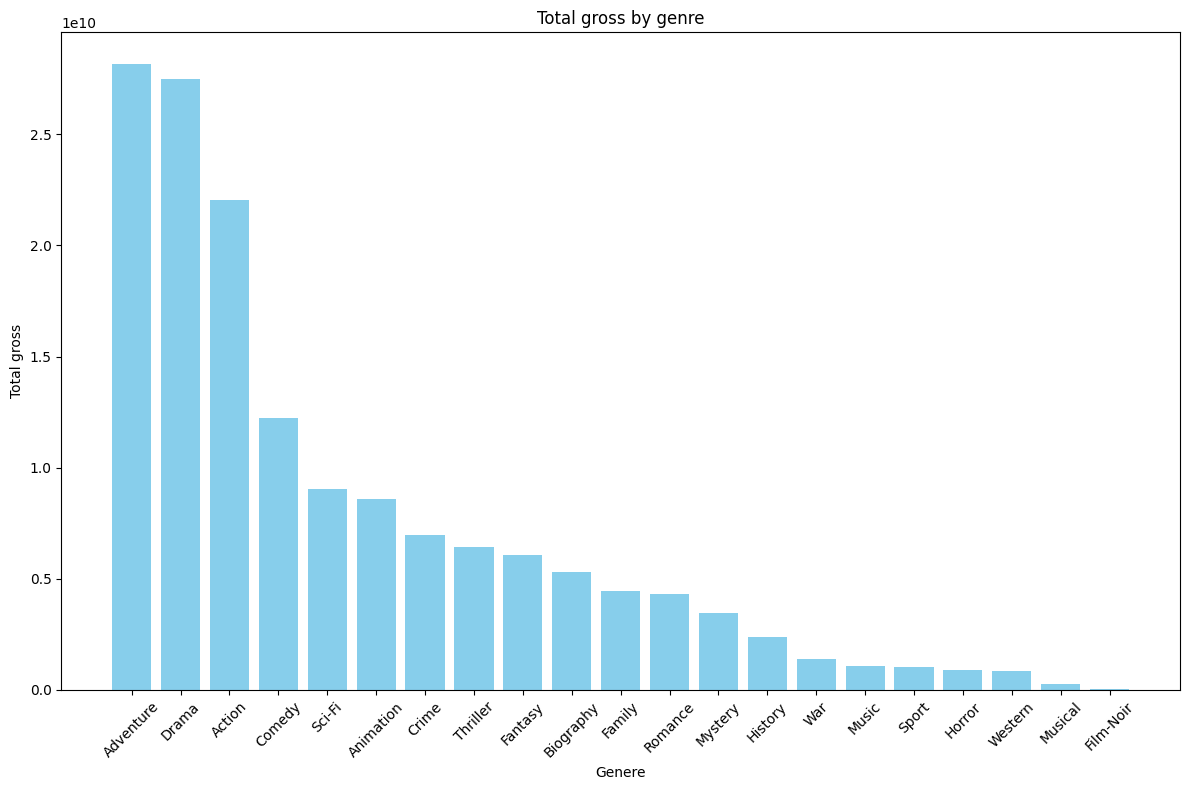

In [23]:
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')

df = df.dropna(subset=['Gross'])

genre_gross_totals = {}

for _, row in df.iterrows():
    genres = row['Genre'].split(", ")
    gross = row['Gross']

    for genre in genres:
        if genre in genre_gross_totals:
            genre_gross_totals[genre] += gross
        else:
            genre_gross_totals[genre] = gross

gross_df = pd.DataFrame(list(genre_gross_totals.items()), columns=["Genre", "Total_Gross"])
gross_df = gross_df.sort_values(by="Total_Gross", ascending=False)

plt.figure(figsize=(12, 8))
plt.bar(gross_df["Genre"], gross_df["Total_Gross"], color="skyblue")
plt.xlabel("Genere")
plt.ylabel("Total gross")
plt.title("Total gross by genre")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# CON DISTINZIONE SUL CERTIFICATO

1. Trovare tutti i film pubblicati dopo il 2015 raggruppati per genere (ad esempio "fantascienza" o "giallo"); visualizzare in un istogramma il numero di film per ogni genere

In [24]:
genre_counts_by_certificate = {}

for col_name in collections:
    collection = myDb[col_name]
    genre_count = {}

    cursor = collection.find({"Released_Year": {"$gt": 2015}})
    for film in cursor:
        genres = film["Genre"].split(", ")
        for genre in genres:
            if genre in genre_count:
                genre_count[genre] += 1
            else:
                genre_count[genre] = 1

    genre_counts_by_certificate[col_name] = genre_count

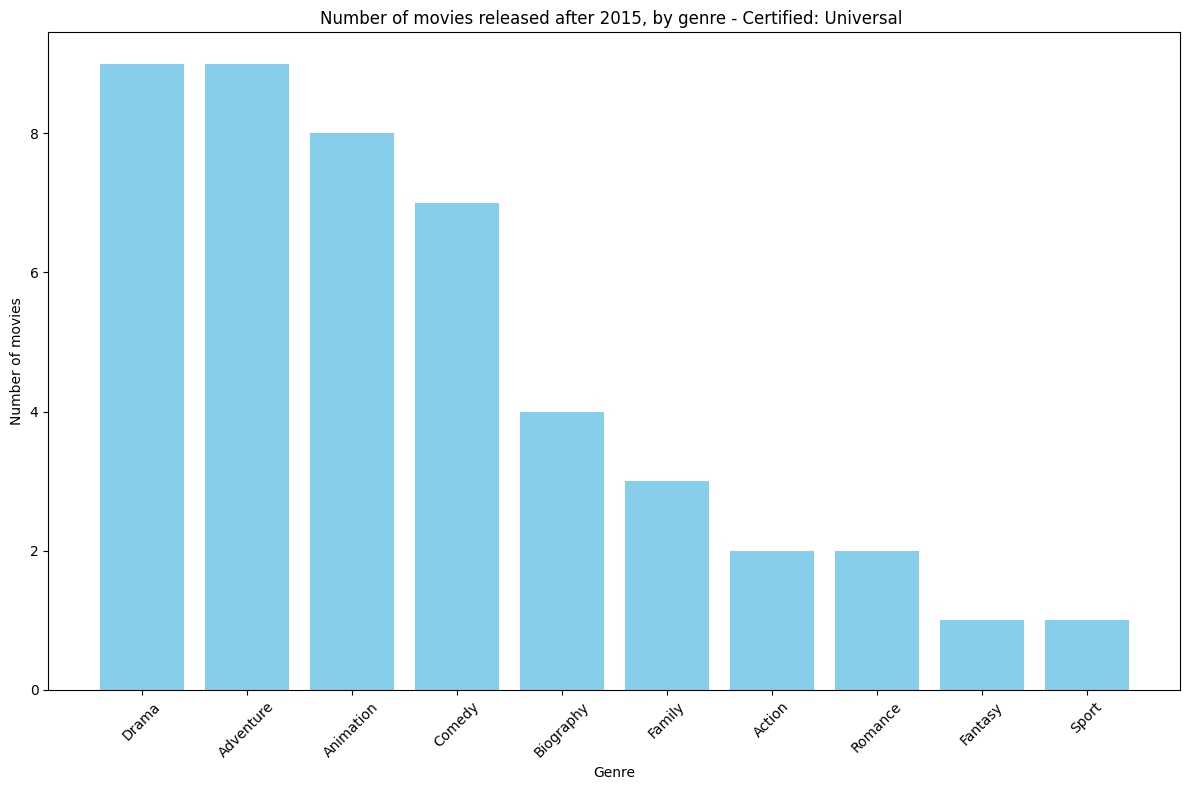

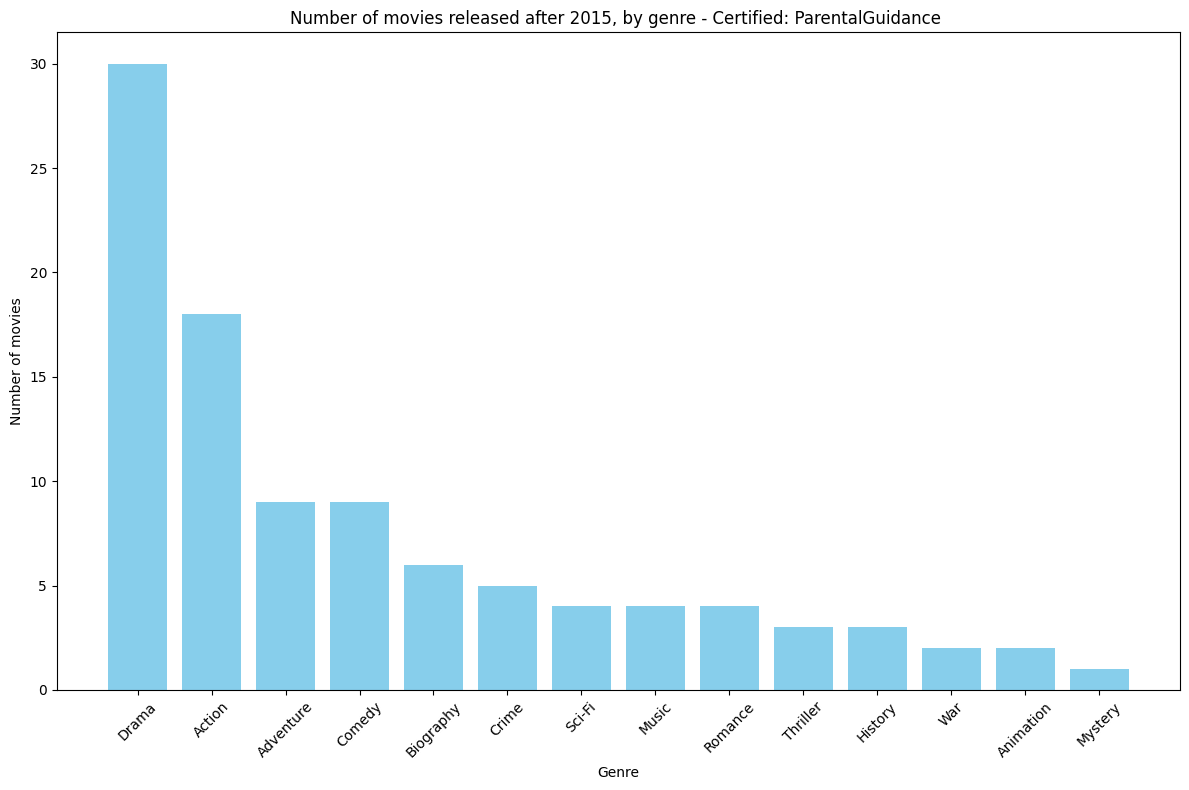

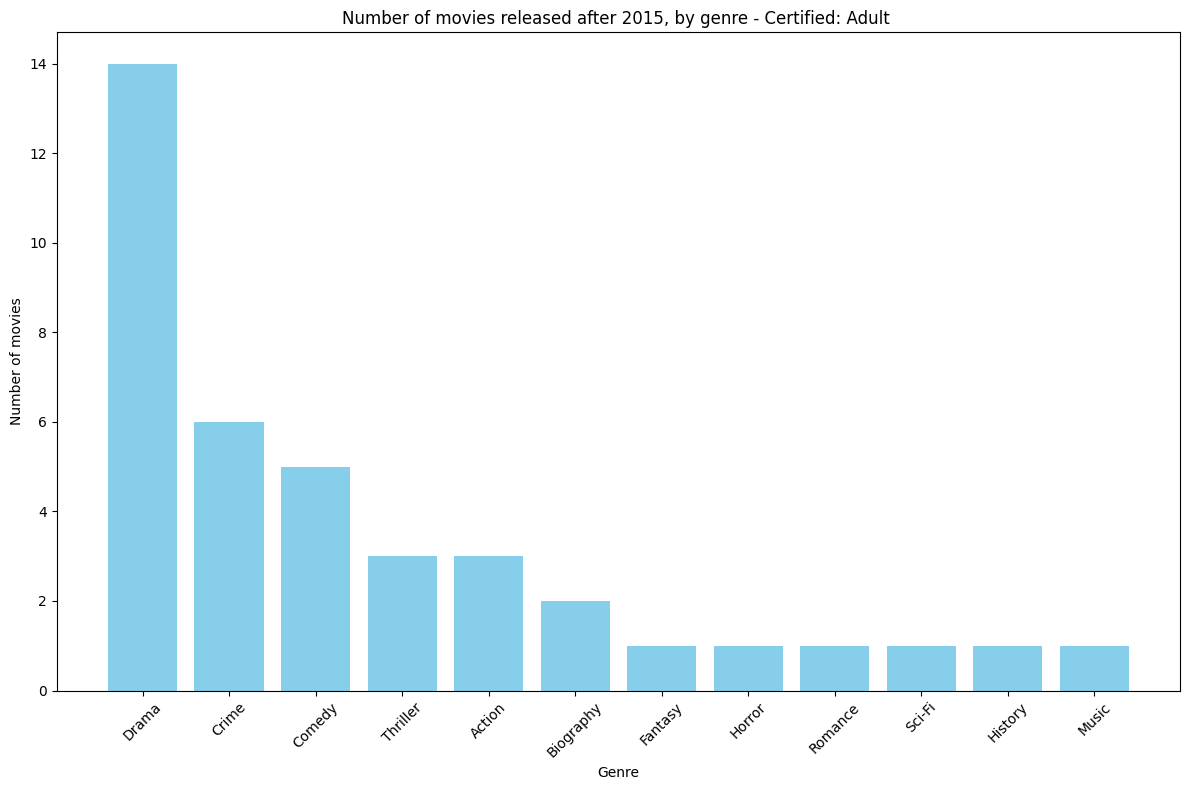

In [25]:
for certificate, genre_count in genre_counts_by_certificate.items():
        genre_df = pd.DataFrame(list(genre_count.items()), columns=["Genre", "Count"])
        genre_df = genre_df.sort_values(by="Count", ascending=False)

        plt.figure(figsize=(12, 8))
        plt.bar(genre_df["Genre"], genre_df["Count"], color="skyblue")
        plt.xlabel("Genre")
        plt.ylabel("Number of movies")
        plt.title(f"Number of movies released after 2015, by genre - Certified: {certificate} ")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

2. Trovare i primi 5 film per ogni genere, sulla base del voto.

In [26]:
top_movies_by_genre_certificate = {}

for col_name in collections:
    collection = myDb[col_name]
    genres = lista_generi_unici
    
    # Inizializza la struttura per la collection corrente
    top_movies_by_genre_certificate[col_name] = {}
    
    for genre in lista_generi_unici:
        # Recupera i top 5 film per il genere corrente nella collection corrente
        movies = list(
            collection.find({"Genre": {"$regex": f"\\b{genre}\\b", "$options": "i"}})
                      .sort("IMDB_Rating", -1)
                      .limit(5)
        )
        if movies:  # Aggiungi solo se ci sono film per il genere
            top_movies_by_genre_certificate[col_name][genre] = movies

# Stampa i risultati in modo leggibile
for certificate, genres in top_movies_by_genre_certificate.items():
    print(f"\nCertificato: {certificate}")
    for genre, movies in genres.items():
        print(f"\n  Top 5 film per il genere '{genre}':")
        for movie in movies:
            print(f"    - {movie['Series_Title']} (IMDb: {movie['IMDB_Rating']})")


Certificato: Universal

  Top 5 film per il genere 'Biography':
    - Bhaag Milkha Bhaag (IMDb: 8)
    - Lion (IMDb: 8)
    - Dangal (IMDb: 8)
    - Lawrence of Arabia (IMDb: 8)
    - Togo (IMDb: 8)

  Top 5 film per il genere 'Comedy':
    - La vita è bella (IMDb: 9)
    - Amélie (IMDb: 8)
    - The Sting (IMDb: 8)
    - Back to the Future (IMDb: 8)
    - Toy Story (IMDb: 8)

  Top 5 film per il genere 'Western':
    - Once Upon a Time in the West (IMDb: 8)
    - Per qualche dollaro in più (IMDb: 8)
    - Dances with Wolves (IMDb: 8)

  Top 5 film per il genere 'Drama':
    - The Lord of the Rings: The Fellowship of the Ring (IMDb: 9)
    - La vita è bella (IMDb: 9)
    - 12 Angry Men (IMDb: 9)
    - The Lord of the Rings: The Return of the King (IMDb: 9)
    - Soorarai Pottru (IMDb: 9)

  Top 5 film per il genere 'Sci-Fi':
    - Back to the Future (IMDb: 8)
    - 2001: A Space Odyssey (IMDb: 8)
    - The Prestige (IMDb: 8)
    - Terminator 2: Judgment Day (IMDb: 8)
    - Aliens (IMD

3. Trovare il film più vecchio e più recente per ogni genere.

In [32]:
old_new_by_genre_cert = {}

for col_name in collections:
    collection = myDb[col_name]
    certificates = collection.distinct("Certificate")

    for certificate in certificates:
        genres = lista_generi_unici
        genre_data = {}
        for genre in genres:
            oldest = collection.find({"Genre": {"$regex": genre}, "Certificate": certificate},
                                      sort=[("Released_Year", 1)]).limit(1)

            newest = collection.find({"Genre": {"$regex": genre}, "Certificate": certificate},
                                      sort=[("Released_Year", -1)]).limit(1)

            oldest_list = list(oldest)
            newest_list = list(newest)
            if oldest_list and newest_list:
                genre_data[genre] = {
                    "Oldest": oldest_list[0],
                    "Newest": newest_list[0]
                }

        if genre_data:
            old_new_by_genre_cert[(col_name, certificate)] = genre_data

for (collection_name, certificate), genres in old_new_by_genre_cert.items():
    print(f"\nCollection: {collection_name}, Certificate: {certificate}")
    for genre, films in genres.items():
        print(f"  Genre'{genre}':")
        print(f"Oldest: {films['Oldest']['Series_Title']} ({films['Oldest']['Released_Year']})")
        print(f"Newest: {films['Newest']['Series_Title']} ({films['Newest']['Released_Year']})")



Collection: Universal, Certificate: U
  Genre'Biography':
Oldest: Lawrence of Arabia (1962)
Newest: Togo (2019)
  Genre'Comedy':
Oldest: Kind Hearts and Coronets (1949)
Newest: Soul (2020)
  Genre'Western':
Oldest: Per qualche dollaro in più (1965)
Newest: Dances with Wolves (1990)
  Genre'Drama':
Oldest: Apollo 13 (0)
Newest: Soorarai Pottru (2020)
  Genre'Sci-Fi':
Oldest: The Day the Earth Stood Still (1951)
Newest: Star Wars: Episode VII - The Force Awakens (2015)
  Genre'Romance':
Oldest: Gone with the Wind (1939)
Newest: Marriage Story (2019)
  Genre'Sport':
Oldest: Rocky (1976)
Newest: M.S. Dhoni: The Untold Story (2016)
  Genre'Adventure':
Oldest: Apollo 13 (0)
Newest: Soul (2020)
  Genre'Film-Noir':
Oldest: Notorious (1946)
Newest: Notorious (1946)
  Genre'Animation':
Oldest: The Jungle Book (1967)
Newest: Soul (2020)
  Genre'Music':
Oldest: Some Like It Hot (1959)
Newest: Veer-Zaara (2004)
  Genre'Thriller':
Oldest: Le salaire de la peur (1953)
Newest: Drishyam (2013)
  Genre

4. Trovare il film più vecchio con la valutazione più alta.

In [28]:
old_high_by_cert = {}

for col_name in collections:
    collection = myDb[col_name]
    pipeline = [
        {"$sort": {"Released_Year": 1, "IMDB_Rating": -1}},
        {"$limit": 1},
        {"$project": {"Series_Title": 1, "Released_Year": 1, "IMDB_Rating": 1}}
    ]

    result = list(collection.aggregate(pipeline))
    if result:
        old_high_by_cert[col_name] = result[0]

for certificate, film in old_high_by_cert.items():
    print(f"\nCertificate: {certificate}")
    print(f"{film['Series_Title']}")
    print(f"Released year: {film['Released_Year']}")
    print(f"Rating IMDb: {film['IMDB_Rating']}")


Certificate: Universal
: Apollo 13
Released year: 0
Rating IMDb: 8

Certificate: ParentalGuidance
: Citizen Kane
Released year: 1941
Rating IMDb: 8

Certificate: Adult
: Rope
Released year: 1948
Rating IMDb: 8


5. Trovare i primi 5 film con la maggiore durata.

In [33]:
longest_5_by_cert = {}

for col_name in collections:
    collection = myDb[col_name]
    pipeline = [
        {"$sort": {"Runtime": -1}},
        {"$limit": 5},
        {"$project": {"Series_Title": 1, "Runtime": 1}}
    ]

    results = list(collection.aggregate(pipeline))
    longest_5_by_cert[col_name] = results

for col_name, movies in longest_5_by_cert.items():
    print(f"Collection: {col_name}")
    print("Longest movies")
    for movie in movies:
        title = movie.get("Series_Title", "Title not found")
        runtime = movie.get("Runtime", "Runtime non disponibile")
        print(f" - {title} : {runtime}")
    print()

Collection: Universal
Longest movies
 - Trois couleurs: Rouge : 99 min
 - Höstsonaten : 99 min
 - How to Train Your Dragon : 98 min
 - Fa yeung nin wah : 98 min
 - WALL·E : 98 min

Collection: ParentalGuidance
Longest movies
 - Kung fu : 99 min
 - Do lok tin si : 99 min
 - Shaun of the Dead : 99 min
 - The Grand Budapest Hotel : 99 min
 - La haine : 98 min

Collection: Adult
Longest movies
 - Per un pugno di dollari : 99 min
 - Blood Simple : 99 min
 - Fargo : 98 min
 - Mad Max 2 : 96 min
 - Det sjunde inseglet : 96 min



6. Trovare l’ammontare degli incassi per ogni genere e visualizzarlo in un istogramma.

Vado ad effettuare una conversione in valori numerici della colonna Gross, con coerce vado ad impostare come NaN i valori non convertibili e ne droppo le corrispettive righe con dropna.
In questo modo abbiamo un df la cui colonna Gross contiene solo valori validi ed utilizzabili per l'interrogazione.

In [30]:
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')
df = df.dropna(subset=['Gross'])

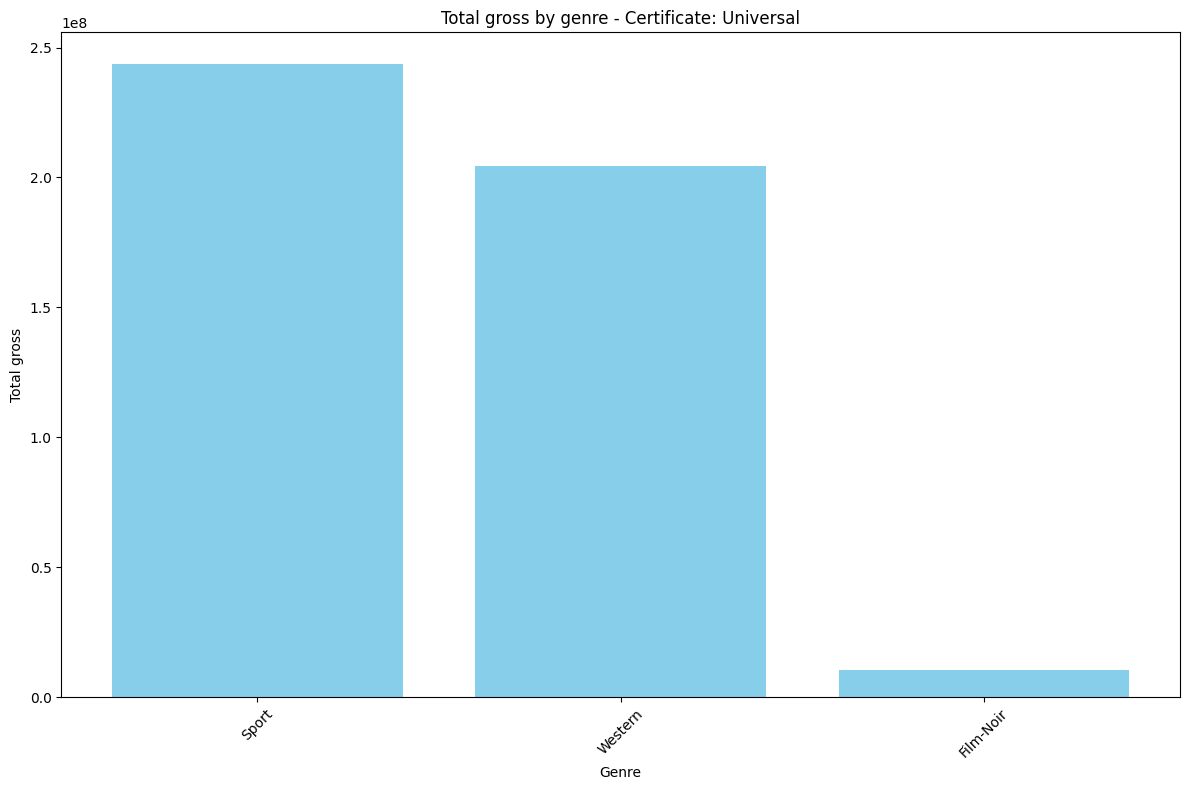

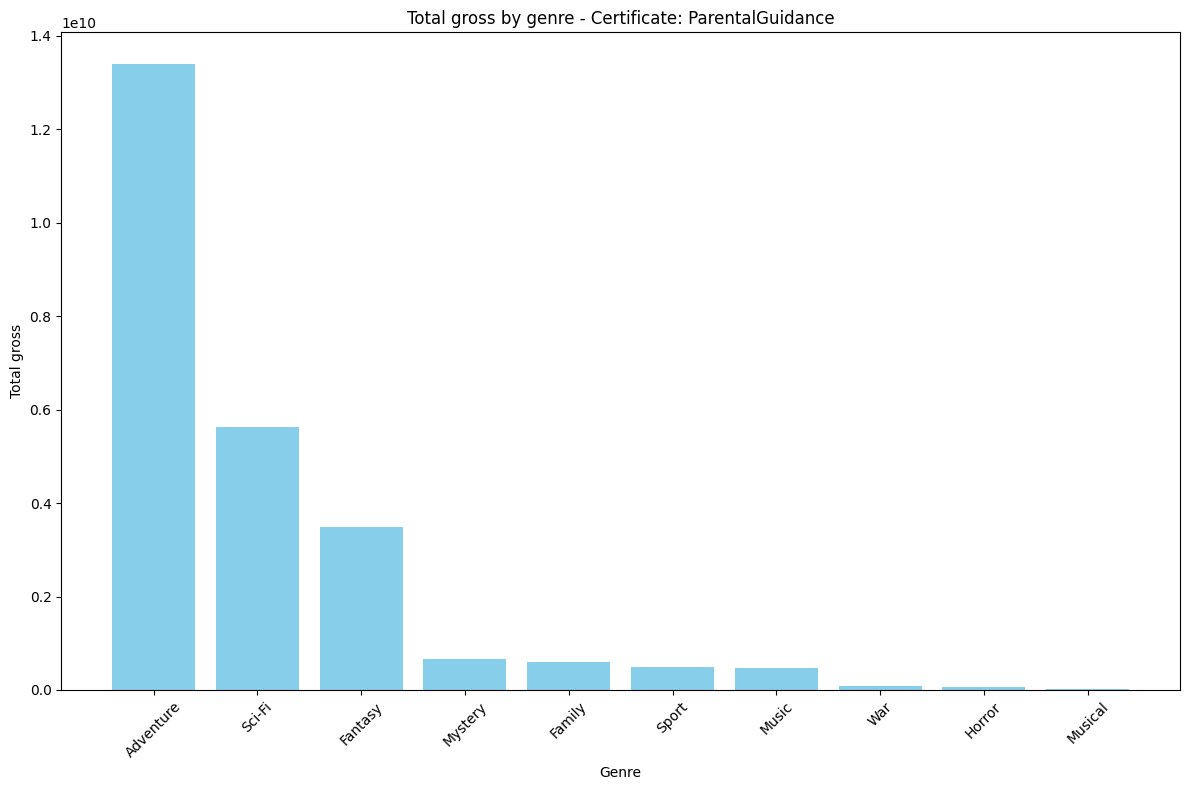

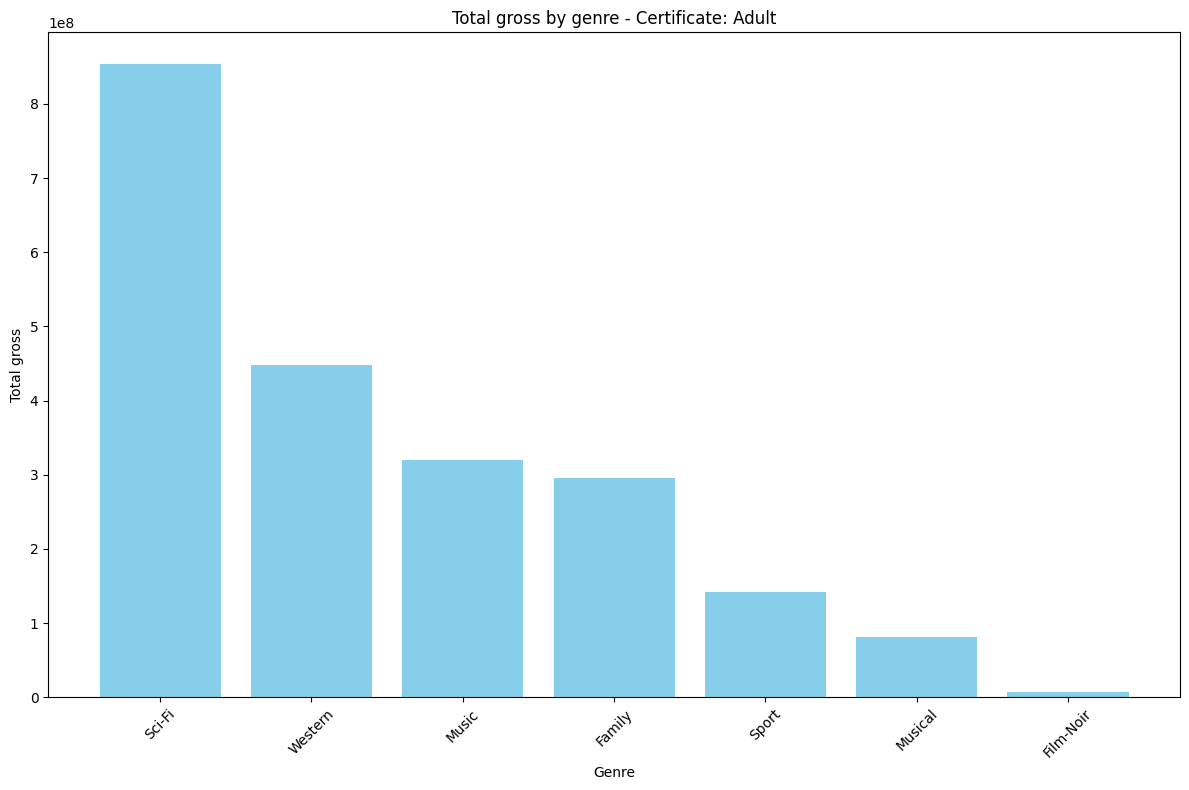

In [31]:
gross_by_cert = {}

for col_name in collections:
    collection = myDb[col_name]
    genre_gross = {}

    cursor = collection.find()
    for film in cursor:
        
        genres = film["Genre"].split(", ")
        gross = float(film.get("Gross", 0))
        for genre in genres:
            if genre in genre_gross:
                genre_gross[genre] += gross
            else:
                genre_gross[genre] = gross

    gross_by_cert[col_name] = genre_gross

for certificate, genre_gross in gross_by_cert.items():
    genre_df = pd.DataFrame(list(genre_gross.items()), columns=["Genre", "Total_Gross"])
    genre_df = genre_df.sort_values(by="Total_Gross", ascending=False)

    plt.figure(figsize=(12, 8))
    plt.bar(genre_df["Genre"], genre_df["Total_Gross"], color="skyblue")
    plt.xlabel("Genre")
    plt.ylabel("Total gross")
    plt.title(f"Total gross by genre - Certificate: {certificate}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [34]:
recommended_movies = []
for col_name in collections:
    collection = myDb[col_name]

    pipeline = [
        {"$match": {
            "Genre": {"$in": ["Sci-Fi", "Adventure"]},
            "Runtime": {"$lte": 90}
        }},
        {"$sort": {"IMDB_Rating": -1}},
        {"$limit": 3},
        {"$project": {"Series_Title": 1, "Genre": 1, "Runtime": 1, "IMDB_Rating": 1}}
    ]

    results = list(collection.aggregate(pipeline))
    print(f"\nCollezione {col_name} - Film trovati: {len(results)}")
    for movie in results:
        print(f"  Titolo: {movie['Series_Title']}, Genere: {movie['Genre']}, Durata: {movie['Runtime']} minuti, Rating IMDb: {movie['IMDB_Rating']}")

    recommended_movies.extend(results)

recommended_movies = sorted(recommended_movies, key=lambda x: x["IMDB_Rating"], reverse=True)[:3]

if recommended_movies:
    print("\nFilm Raccomandati:")
    for movie in recommended_movies:
        print(f"Titolo: {movie['Series_Title']}, Genere: {movie['Genre']}, Durata: {movie['Runtime']} minuti, Rating IMDb: {movie['IMDB_Rating']}")
else:
    print("Nessun film trovato che soddisfi i criteri di raccomandazione.")



Collezione Universal - Film trovati: 0

Collezione ParentalGuidance - Film trovati: 0

Collezione Adult - Film trovati: 0
Nessun film trovato che soddisfi i criteri di raccomandazione.


In [37]:
combined_genre_pipeline = [
    {"$match": {
        "Genre": {"$all": ["Sci-Fi", "Adventure"]},
        "Runtime": {"$lte": 90}
    }},
    {"$sort": {"IMDB_Rating": -1}},
    {"$limit": 3},
    {"$project": {"Series_Title": 1, "Genre": 1, "Runtime": 1, "IMDB_Rating": 1}}
]

combined_genre_movies = []
for col_name in collections:
    collection = myDb[col_name]
    results = list(collection.aggregate(combined_genre_pipeline))
    combined_genre_movies.extend(results)

print("\nFilm con Generi Sci-Fi e Adventure e Durata ≤ 90 Minuti:")
if combined_genre_movies:
    for movie in combined_genre_movies:
        print(f"Titolo: {movie['Series_Title']}, Genere: {movie['Genre']}, Durata: {movie['Runtime']} minuti, Rating IMDb: {movie['IMDB_Rating']}")
else:
    print("No movies")


Film con Generi Sci-Fi e Adventure e Durata ≤ 90 Minuti:
No movies


In [41]:
ratings_sci_fi_adventure = []

for col_name in collections:
    collection = myDb[col_name]
    pipeline = [
        {"$match": {"Genre": {"$all": ["Sci-Fi", "Adventure"]}}},
        {"$project": {"IMDB_Rating": 1}}
    ]
    results = collection.aggregate(pipeline)
    ratings_sci_fi_adventure.extend([film["IMDB_Rating"] for film in results if "IMDB_Rating" in film])

if ratings_sci_fi_adventure:
    avg_rating_sci_fi_adventure = sum(ratings_sci_fi_adventure) / len(ratings_sci_fi_adventure)
    print(f"Stima del rating medio per film Sci-Fi e Adventure (senza vincolo di durata): {avg_rating_sci_fi_adventure:.2f}")
else:
    print("Nessun film trovato con entrambi i generi Sci-Fi e Adventure.")

ratings_short_sci_fi_adventure = []

for col_name in collections:
    collection = myDb[col_name]
    pipeline = [
        {"$match": {
            "Genre": {"$in": ["Sci-Fi", "Adventure"]},
            "Runtime": {"$lte": 90}
        }},
        {"$project": {"IMDB_Rating": 1}}
    ]
    results = collection.aggregate(pipeline)
    ratings_short_sci_fi_adventure.extend([film["IMDB_Rating"] for film in results if "IMDB_Rating" in film])

if ratings_short_sci_fi_adventure:
    avg_rating_short_sci_fi_adventure = sum(ratings_short_sci_fi_adventure) / len(ratings_short_sci_fi_adventure)
    print(f"Stima del rating medio per film Sci-Fi o Adventure con durata ≤ 90 minuti: {avg_rating_short_sci_fi_adventure:.2f}")
else:
    print("Nessun film trovato con genere Sci-Fi o Adventure e durata ≤ 90 minuti.")

Nessun film trovato con entrambi i generi Sci-Fi e Adventure.
Nessun film trovato con genere Sci-Fi o Adventure e durata ≤ 90 minuti.


In [42]:
weights = []
ratings = []

for col_name in collections:
    collection = myDb[col_name]

    pipeline = [
        {"$match": {
            "Genre": {"$all": ["Sci-Fi", "Adventure"]},
            "Runtime": {"$lte": 90}
        }},
        {"$project": {"IMDB_Rating": 1}}
    ]
    results = list(collection.aggregate(pipeline))
    ratings.extend([r["IMDB_Rating"] for r in results])
    weights.extend([3] * len(results))

    pipeline = [
        {"$match": {
            "Genre": {"$in": ["Sci-Fi", "Adventure"]}
        }},
        {"$project": {"IMDB_Rating": 1}}
    ]
    results = list(collection.aggregate(pipeline))
    ratings.extend([r["IMDB_Rating"] for r in results])
    weights.extend([2] * len(results))

    pipeline = [
        {"$match": {
            "Runtime": {"$lte": 90}
        }},
        {"$project": {"IMDB_Rating": 1}}
    ]
    results = list(collection.aggregate(pipeline))
    ratings.extend([r["IMDB_Rating"] for r in results])
    weights.extend([1] * len(results))

if ratings:
    weighted_avg_rating = np.average(ratings, weights=weights)
    print(f"Ipotetico rating medio per un film Sci-Fi e Adventure con durata ≤ 90 minuti: {weighted_avg_rating:.2f}")
else:
    print("Nessun dato disponibile per calcolare una stima.")

Nessun dato disponibile per calcolare una stima.
